<a href="https://colab.research.google.com/github/Shahbaz894/MLOps/blob/main/MlPipeLine_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.drop('PassengerId', axis=1, inplace=True)

In [ ]:
df.drop('Ticket', axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [ ]:
#fill missing value in age col
df['Age'].isnull().sum()

86

In [ ]:
from sklearn.impute import KNNImputer

# Create a DataFrame with only the 'age' column
age_column = df[['Age']]

# Initialize the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=3)

# Fit and transform the 'age' column
imputed_age_column = knn_imputer.fit_transform(age_column)

# Replace the original 'age' column with the imputed values
df['Age'] = imputed_age_column

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
#check and fill missing value in cabin column
df['Cabin'].isnull().sum()

327

In [ ]:
df['Cabin'].sample(100)

120    NaN
173    NaN
222    F33
12     B45
107    NaN
      ... 
385    NaN
32     NaN
200    NaN
154    NaN
405    D38
Name: Cabin, Length: 100, dtype: object

In [ ]:
df['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [ ]:
# Fill missing "Cabin" values based on passenger class
class_cabin_mapping = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
# Update the "Cabin" column with the imputed values
df['Cabin'] = class_cabin_mapping

In [ ]:
df['Cabin'].isnull().sum()

0

In [ ]:
df['Cabin'].sample(10)

307    F E46
68       C53
93     F E46
2         F4
162       F4
27     F E46
159    F E46
31        F4
399    F E46
212       F4
Name: Cabin, dtype: object

In [ ]:
df['Cabin_Deck'] = df['Cabin'].str[0]
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop(columns=['Cabin'], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,F,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,F,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,F,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,F,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,F,1


In [ ]:
df.drop('Name', axis=1, inplace=True)

In [ ]:
# import pandas as pd

# # Assuming df is your DataFrame
# name_components = df['Name'].str.extract(r'(?P<last_name>.*?),\s*(?P<title>.*?)\.\s*(?P<first_name>.*?)(?:\s*\((?P<middle_name>.*?)\))?')

# # Concatenate the extracted components with the original DataFrame
# df = pd.concat([df, name_components], axis=1)

# # Drop unnecessary columns
# df.drop(columns=['Name', 'middle_name'], inplace=True)

# # Display the DataFrame
# print(df.head())



In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin
0,0,3,male,34.5,0,0,7.8292,Q,F,1
1,1,3,female,47.0,1,0,7.0000,S,F,1
2,0,2,male,62.0,0,0,9.6875,Q,F,1
3,0,3,male,27.0,0,0,8.6625,S,F,1
4,1,3,female,22.0,1,1,12.2875,S,F,1


In [ ]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin
0,0,3,male,34.50000,0,0,7.8292,Q,F,1
1,1,3,female,47.00000,1,0,7.0000,S,F,1
2,0,2,male,62.00000,0,0,9.6875,Q,F,1
3,0,3,male,27.00000,0,0,8.6625,S,F,1
4,1,3,female,22.00000,1,1,12.2875,S,F,1
5,0,3,male,14.00000,0,0,9.2250,S,F,1
6,1,3,female,30.00000,0,0,7.6292,Q,F,1
7,0,2,male,26.00000,1,1,29.0000,S,F,1
8,1,3,female,18.00000,0,0,7.2292,C,F,1
9,0,3,male,21.00000,2,0,24.1500,S,F,1


In [ ]:
# X = df.drop('Survived', axis=1)
# y = df['Survived']

Uinvariant and MultiVariant Analysis

<Axes: xlabel='Sex'>

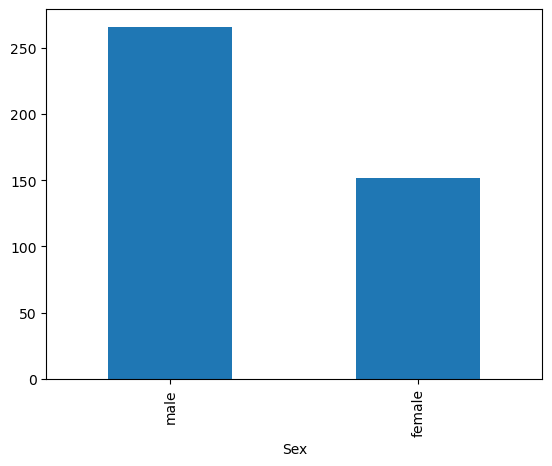

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Sex'].value_counts().plot(kind='bar')


<Axes: xlabel='Survived'>

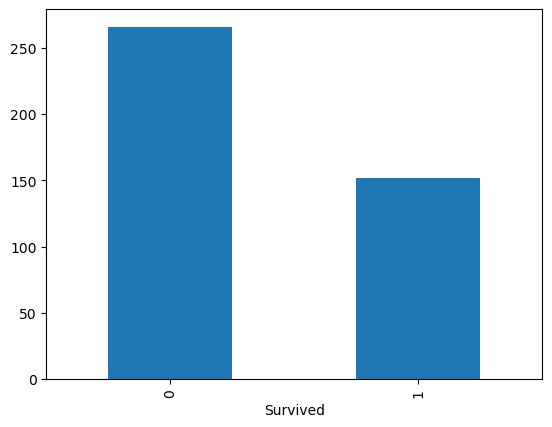

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

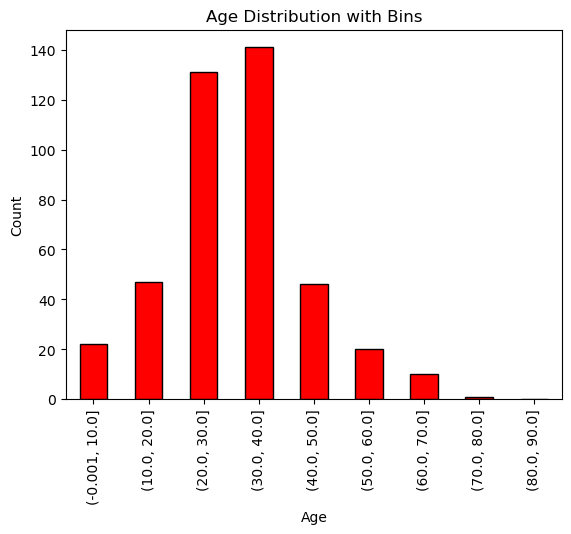

In [ ]:
# Assuming df is your DataFrame
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['Age'].value_counts(bins=bins, sort=False).plot(kind='bar', edgecolor='black', color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution with Bins')

# Show the plot
plt.show()


<Axes: ylabel='Frequency'>

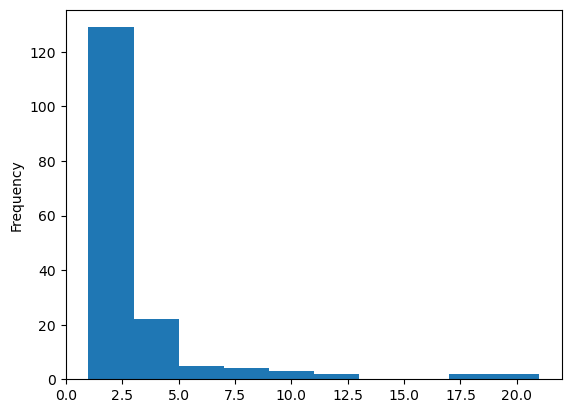

In [ ]:
df['Fare'].value_counts().plot(kind='hist')

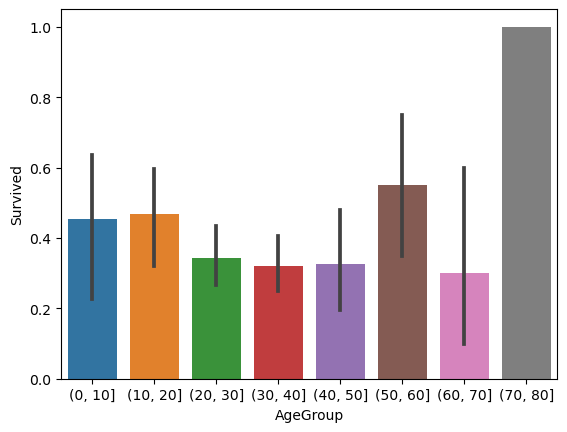

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Plot the average 'Survived' for each age group
sns.barplot(x='AgeGroup', y='Survived', data=df)

# Show the plot
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

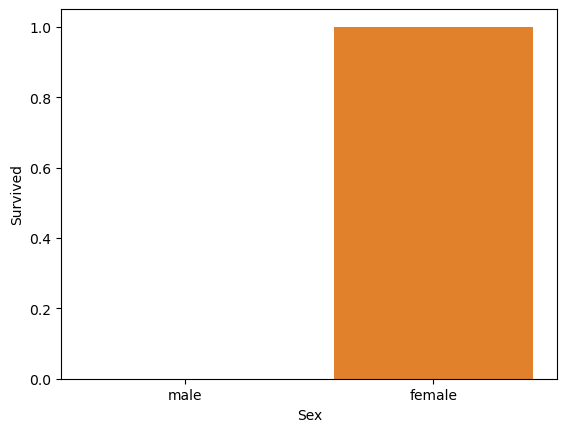

In [ ]:

sns.barplot(x=df['Sex'], y=df['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

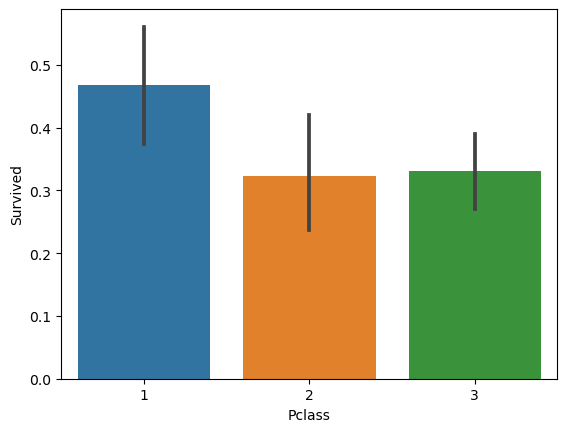

In [ ]:

sns.barplot(x=df['Pclass'], y=df['Survived'])

In [ ]:
# corr_df = df[['Pclass','Survived', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Cabin_Deck', 'Has_Cabin']].corr()
# plt.figure(figsize = (16, 8))
# sns.heatmap(data = corr_df, annot = True, cmap = 'coolwarm')
# plt.show()

In [ ]:
df['Age'].value_counts()

Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 80, dtype: int64

In [ ]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\4080107027.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

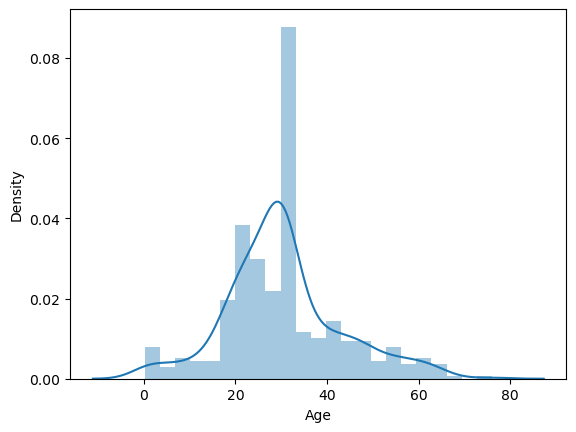

In [ ]:
# outliers on the basis of price column
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['Age'])

<Axes: >

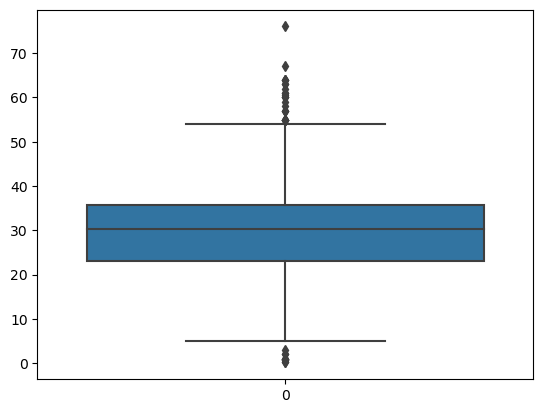

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
upper_limit=df['Age'].quantile(0.99)
upper_limit

63.829999999999984

In [ ]:
lower_limit=df['Age'].quantile(0.01)
lower_limit

0.9336

In [ ]:
#Trimming
new_df=df[(df['Age']<=63) & (df['Age']>=0.93)]

<Axes: >

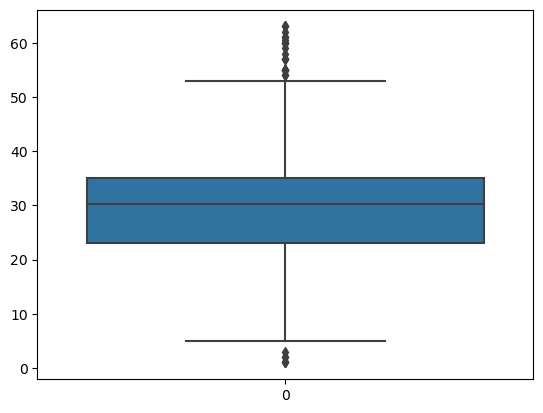

In [ ]:
sns.boxplot(new_df['Age'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\366217279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

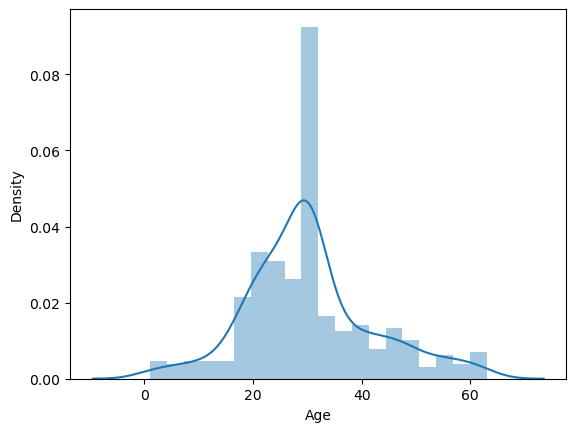

In [ ]:
sns.distplot(new_df['Age'])

In [ ]:
#capping -->winserization
df['Age']=np.where(df['Age']>=upper_limit,
        upper_limit,
       np.where( df['Age']<=lower_limit,
               lower_limit,
               df['Age']))

In [ ]:
df['Age'].describe()

count    418.000000
mean      30.238662
std       12.508506
min        0.933600
25%       23.000000
50%       30.272590
75%       35.750000
max       63.830000
Name: Age, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

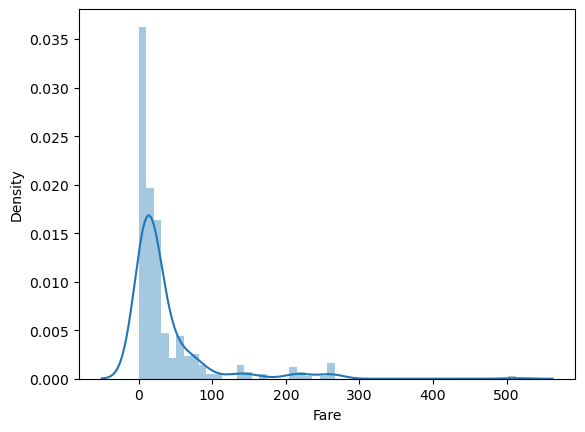

In [ ]:
sns.distplot(df['Fare'])

<Axes: >

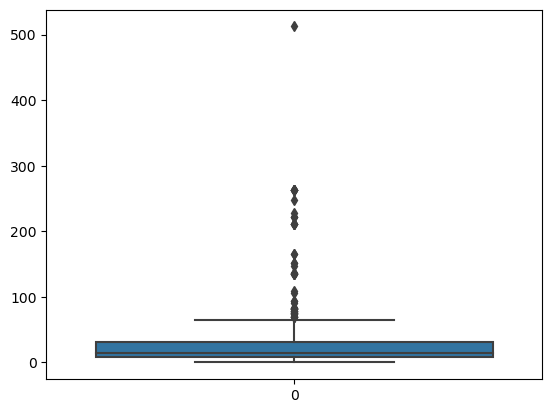

In [ ]:
sns.boxplot(df['Fare'])

In [ ]:
# Finding the IQR because data is skewd thats why we used percentile method
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)

In [ ]:
percentile25


7.8958

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

23.6042

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 66.9063
Lower limit -27.5105


In [ ]:
#finding outlier
# df[df['Fare'] > upper_limit]

In [ ]:
new_df_cap = df.copy()

df['Fare'] = np.where(
    df['Fare'] > upper_limit,
    upper_limit,
    np.where(
        df['Fare'] < lower_limit,
        lower_limit,
        df['Fare']
    )
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\1542300215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

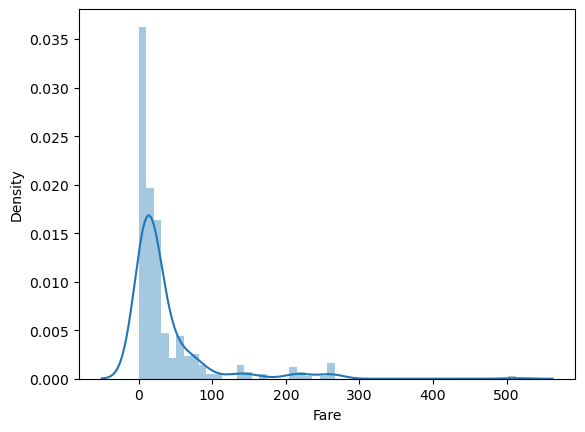

In [ ]:
sns.distplot(new_df_cap['Fare'])

<Axes: >

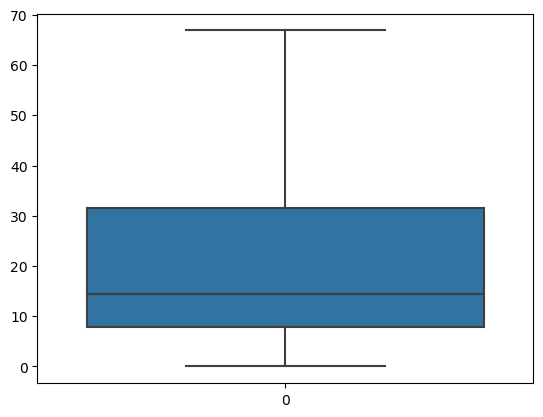

In [ ]:
sns.boxplot(df['Fare'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\63704092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Parch'])


<Axes: xlabel='Parch', ylabel='Density'>

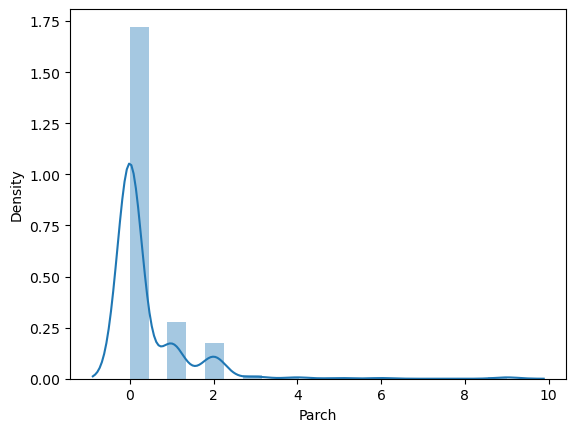

In [ ]:
sns.distplot(df['Parch'])

<Axes: >

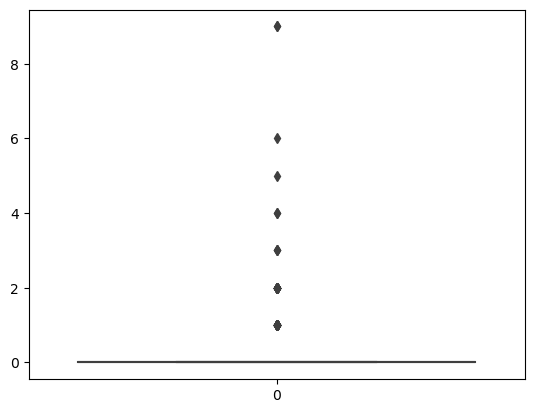

In [ ]:
sns.boxplot(df['Parch'])

In [ ]:
percentile25 = df['Parch'].quantile(0.25)
percentile75 = df['Parch'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
df['Parch'] = np.where(
    df['Parch'] > upper_limit,
    upper_limit,
    np.where(
        df['Parch'] < lower_limit,
        lower_limit,
        df['Parch']
    )
)

<Axes: >

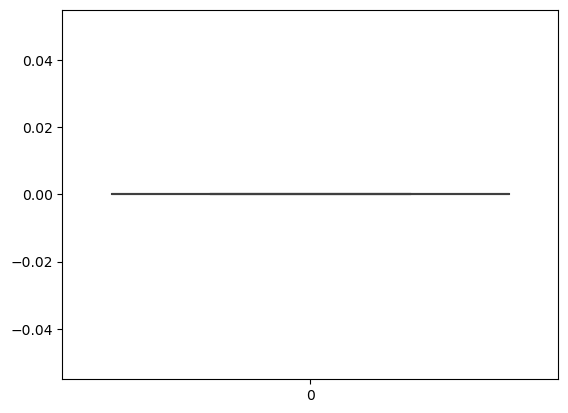

In [ ]:
sns.boxplot(df['Parch'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\63704092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Parch'])
D:\sofware_anaconda\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Parch', ylabel='Density'>

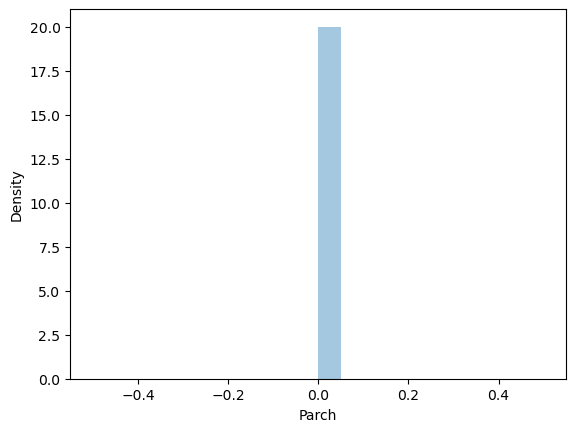

In [ ]:
sns.distplot(df['Parch'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\1634579339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])


<Axes: xlabel='SibSp', ylabel='Density'>

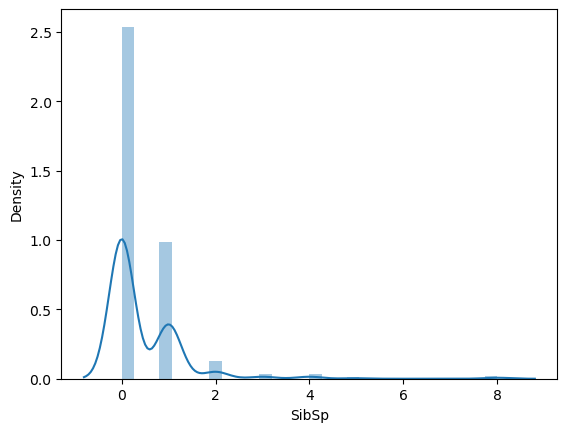

In [ ]:
sns.distplot(df['SibSp'])

<Axes: >

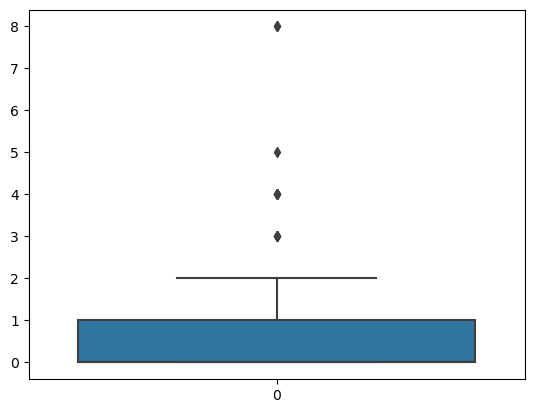

In [ ]:
sns.boxplot(df['SibSp'])

In [ ]:
percentile25 = df['SibSp'].quantile(0.25)
percentile75 = df['SibSp'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
df['SibSp'] = np.where(
    df['SibSp'] > upper_limit,
    upper_limit,
    np.where(
        df['SibSp'] < lower_limit,
        lower_limit,
        df['SibSp']
    )
)

<Axes: >

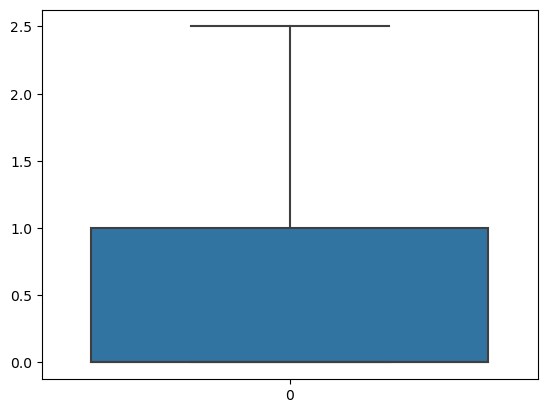

In [ ]:
sns.boxplot(df['SibSp'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15652\3108252318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['SibSp'])


<Axes: xlabel='SibSp', ylabel='Density'>

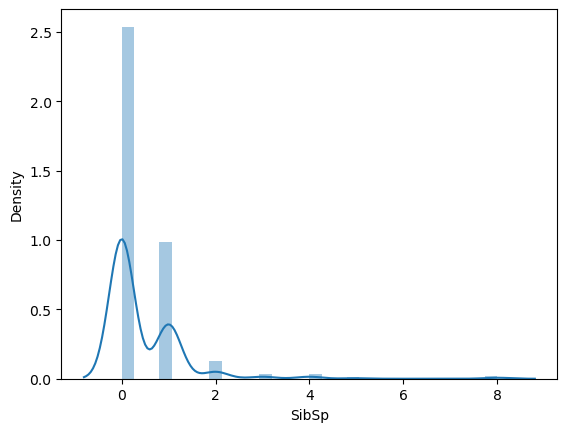

In [ ]:
sns.distplot(df['SibSp'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin,AgeGroup
0,0,3,male,34.5,0.0,0.0,7.8292,Q,F,1,"(30, 40]"
1,1,3,female,47.0,1.0,0.0,7.0000,S,F,1,"(40, 50]"
2,0,2,male,62.0,0.0,0.0,9.6875,Q,F,1,"(60, 70]"
3,0,3,male,27.0,0.0,0.0,8.6625,S,F,1,"(20, 30]"
4,1,3,female,22.0,1.0,0.0,12.2875,S,F,1,"(20, 30]"


In [ ]:

df.drop(columns=['AgeGroup'], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin
0,0,3,male,34.5,0.0,0.0,7.8292,Q,F,1
1,1,3,female,47.0,1.0,0.0,7.0000,S,F,1
2,0,2,male,62.0,0.0,0.0,9.6875,Q,F,1
3,0,3,male,27.0,0.0,0.0,8.6625,S,F,1
4,1,3,female,22.0,1.0,0.0,12.2875,S,F,1


<Axes: xlabel='Embarked', ylabel='Survived'>

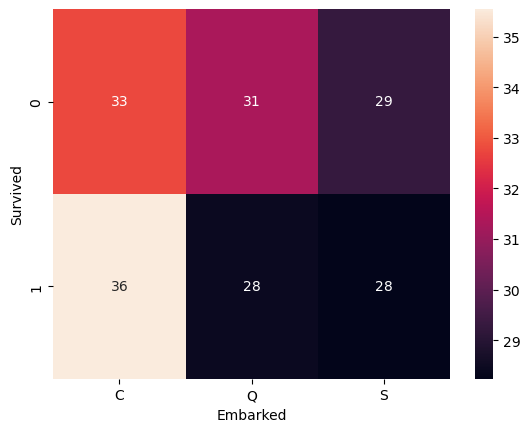

In [ ]:
sns.heatmap(pd.pivot_table(df,index='Survived',columns='Embarked',values='Age',aggfunc='mean'),annot=True)

In [ ]:

pip install hyperopt

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 435.7 kB/s eta 0:00:04
     - -------------------------------------- 0.1/1.6 MB 544.7 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.6 MB 901.1 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.6 MB 901.1 kB/s eta 0:00:02
     ------ --------------------------------- 0.3/1.6 MB 1.1 MB/s eta 0:00:02
     ---------- ----------------------------- 0.4/1.6 MB 1.4 MB/s eta 0:00:01
     --------------- ------------------------ 0.6/1.6 MB 1.8 MB/s eta 0:00:01
     ---------------- ----------------------- 0.7/1.6 MB 1.9 MB/s eta 0:00:01
     --------------------- ------------------ 0.9/1.6 MB 2.0 MB/s eta 0:00:01
     --------------------------- ------------ 1.1/1.6 MB 2.3 MB/s eta 0:00:01
     --------------------------------- ------ 1.3/1.6 MB 2.6 MB/s eta 0:00:01
     -------------------------------------- - 1.5/1.6 MB 2.7 MB

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],
                                                test_size=0.2)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin
59,1,female,36.00000,0.0,0.0,66.9063,C,B,1
227,3,female,30.27259,0.0,0.0,7.7500,Q,F,1
342,3,male,30.27259,1.0,0.0,66.9063,S,F,1
409,3,female,3.00000,1.0,0.0,13.7750,S,F,1
413,3,male,30.27259,0.0,0.0,8.0500,S,F,1
...,...,...,...,...,...,...,...,...,...
170,3,male,30.27259,0.0,0.0,7.5500,S,F,1
123,3,male,28.00000,0.0,0.0,7.2500,S,F,1
364,1,female,25.00000,1.0,0.0,55.4417,C,E,1
67,1,male,47.00000,0.0,0.0,42.4000,S,B,1


In [ ]:
# transformer = ColumnTransformer(transformers=[
#     ('tnf1',SimpleImputer(),['fever']),

#     ('tnf2',OneHotEncoder(sparse=False,drop='first'),['Sex','Embarked','Cabin_Deck'])
# ],remainder='passthrough')

In [ ]:
# one hot encoding
trf1 = ColumnTransformer([
    ('Sex_embarak_Cabin_Deck',OneHotEncoder(sparse=False,handle_unknown='ignore'),[2,3,4])
],remainder='passthrough')

In [ ]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,9))
])

In [ ]:
# Feature selection
trf3 = SelectKBest(score_func=chi2,k=8)

In [ ]:
# train the model
trf4 = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),

])

In [ ]:
# train
pipe.fit(X_train,y_train)

D:\sofware_anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Sex_embarak_Cabin_Deck',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 3, 4])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 9, None))])),
                ('trf3',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x000001A6FEF44A40>)),
                ('trf4', DecisionTreeClassifier())])

In [ ]:

from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Predict
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5238095238095238

In [ ]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

D:\sofware_anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\sofware_anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\sofware_anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\sofware_anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is i

0.6646766169154229

In [ ]:
# export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))